In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

base = automap_base()


# reflect the tables

base.prepare(engine, reflect=True)

# inspector = inspect(engine)

# inspector.get_table_names()

In [6]:
# View all of the classes that automap found

base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Demographics = Base.classes.demographics

Station = base.classes.station

Measurement = base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

initial_date = session.query(func.max(Measurement.date)).all()

initial_date




[('2017-08-23')]

In [10]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(query_date)

2016-08-23


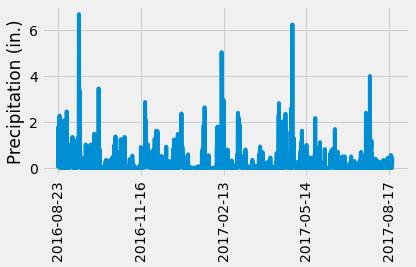

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


precip_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_data, columns = ['date', 'precipitation'])

precip_df.set_index('date', inplace=True)

precip_df

# Sort the dataframe by date


precip_df = precip_df.sort_values(by='date')
precip_df

precip_df = precip_df.dropna()
precip_df

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(x_compat = True, xlabel = "", ylabel = "Precipitation (in.)", legend = False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images/precip_plot.png")

plt.show()

        

        # the plot gets saved to 'output.png'
        #plt.savefig('output.png')








In [12]:
# Use Pandas to print the summary statistics for the precipitation data

precip_df.describe(include='all').round(2)


,precipitation
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset

session.query(Station.station).distinct().count()



9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)                             

session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
                                
# List the stations and the counts in descending order.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# Most active station = 'USC00519281'

tempdata = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

tempdata


[(85.0, 54.0, 71.66378066378067)]

In [16]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == 'USC00519281').all()

station_data


[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [17]:
station_data_df = pd.DataFrame(station_data, columns = ['Temperature'])
station_data_df


,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


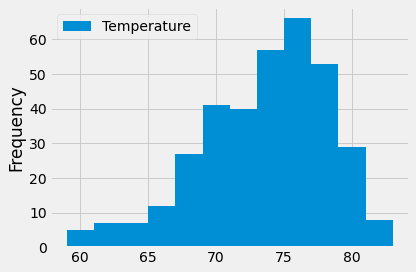

In [18]:
station_data_df.plot.hist(bins = 12)
plt.tight_layout()
plt.savefig("Images/station_hist.png")
plt.show()

# Close session

In [19]:
# Close Session
session.close()